# first data science project

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# loading data
go_to_school = pd.read_csv(r'C:\Users\waleed\Desktop\data.csv')
go_to_school

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,True
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,True
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,True
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,True


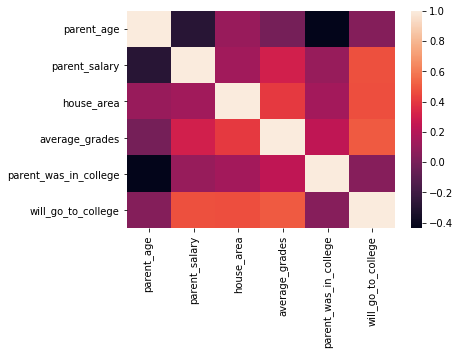

In [4]:
# see correlation between column
sns.heatmap(go_to_school.corr())

# how likely will student go to college if his parents went to college

In [5]:
x=go_to_school.groupby('parent_was_in_college').mean()['will_go_to_college']
x

parent_was_in_college
False    0.475000
True     0.523077
Name: will_go_to_college, dtype: float64

it appeared to me that more than 52% more likely to go to college if parent went to collage 

# what is type of school accreditation have higher rate of entering college

In [19]:
q2=go_to_school.groupby('school_accreditation').mean()['will_go_to_college']
q2

school_accreditation
A    0.515593
B    0.485549
Name: will_go_to_college, dtype: float64

Text(0.5, 1.0, 'what is type of school accreditation have higher rate of entering college')

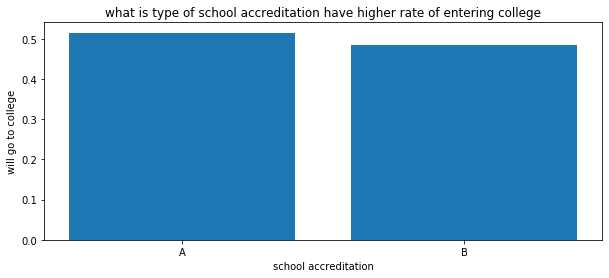

In [7]:
plt.figure(figsize=(10,4))
plt.bar(q2.keys(),q2,align='center',)
plt.xlabel('school accreditation')
plt.ylabel('will go to college')
plt.title('what is type of school accreditation have higher rate of entering college')

school accreditation of type A have more likely to go to college than school accreditation B by 3 percent only 

# can we predict where someone will go to college or not by data provided 

In [8]:
# dividing dependent variable and independent variable
xData=go_to_school.iloc[:,:-1]
yData=go_to_school.iloc[:,-1]

In [11]:
# handling categorical data
xData=xData.replace(to_replace='Academic',value=1)
xData=xData.replace(to_replace='Vocational',value=0)
xData=xData.replace(to_replace='A',value=2)
xData=xData.replace(to_replace='B',value=1)
xData=xData.replace(to_replace='Male',value=1)
xData=xData.replace(to_replace='Female',value=0)
xData=xData.replace(to_replace='Very Interested', value=2)
xData=xData.replace(to_replace='Interested', value=1)
xData=xData.replace(to_replace='Uncertain', value=0)
xData=xData.replace(to_replace='Less Interested', value=-1)
xData=xData.replace(to_replace='Not Interested', value=-2)
xData=xData.replace(to_replace='Urban', value=1)
xData=xData.replace(to_replace='Rural', value=0)
xData=xData.astype(int)
yData=yData.astype(int)


xData

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college
0,1,2,1,-1,1,56,6950000,83,84,0
1,1,2,1,-1,1,57,4410000,76,86,0
2,1,1,0,2,1,50,6500000,80,87,0
3,0,1,1,2,0,49,6600000,78,82,1
4,1,2,0,2,1,57,5250000,75,86,0
...,...,...,...,...,...,...,...,...,...,...
995,0,2,0,2,0,49,7420000,63,85,1
996,1,1,0,-1,0,51,7480000,84,89,1
997,0,2,1,-1,1,49,5550000,75,79,0
998,1,1,1,0,0,53,5840000,105,87,1


In [12]:
#dviding data into trining and testing 
trainX ,testx ,trainY ,testY =train_test_split(xData ,yData,test_size=0.25,random_state=10)

In [13]:
#defining the model
model=LinearRegression(normalize=True)
#trining the model
model.fit(trainX,trainY)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [17]:
#tesing the model 
Ypredected=model.predict(testx)

r2_score(testY,Ypredected)

0.5703867290351483